# Loan Application Status Prediction

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import OneHotEncoder,LabelEncoder ,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

# Checking for null values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Some columns have missing values,so we have to handel it.

In [6]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Checking information about data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- 8 columns are of object type and remaining are of int and float type 
- looks like some columns have missing values.

# Checking mathematical aspects about data

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Observations
- Columns have missing values.
- In ApplicantIncome column mean is greatter then median hence it shows column have outliers and skewness.
- In CoapplicantIncome column mean is greatter then median hence it shows column have outliers and skewness.
- In LoanAmount column median is greater then mean hence data is left skewed and have outliers
- In Loan_Amount_Term median is greater then mean  and mininum value is so far from 25th percentile hence left skewed column.
- In Credit_History column looks like there are only two values 1 and 0 .

# Checking Correlation.

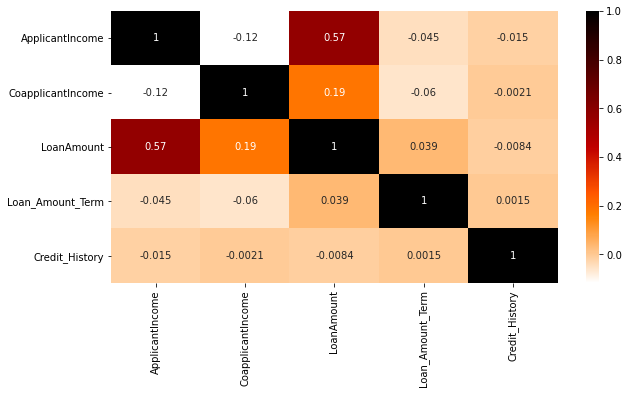

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="gist_heat_r")
plt.show()

- None of the columns are highly correlated to each other

# Looking for the Output Column

In [10]:
round(df.Loan_Status.value_counts()/614,2)

Y    0.69
N    0.31
Name: Loan_Status, dtype: float64

- Looks like output column is imbalanced because classes are in the ratio of 7:3 , so we have to make it balance.

# Data Cleaning

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- These all columns have null values, so we are going to handle.

# saperating numericals & categorical columns

In [12]:
num_var = []
cat_var = []
for i in df.columns:
    if df[i].dtype == "O":
        cat_var.append(i)
    else:
        num_var.append(i)    

In [13]:
print("Numericals VAriables \n-------------------------------------")
for i in num_var:
    print(i ,'has ',df[i].isnull().sum(),"nan values")

print("\nCategorical VAriables \n-------------------------------------")    
for i in cat_var:
    print(i ,'has ',df[i].isnull().sum(),"nan values")  

Numericals VAriables 
-------------------------------------
ApplicantIncome has  0 nan values
CoapplicantIncome has  0 nan values
LoanAmount has  22 nan values
Loan_Amount_Term has  14 nan values
Credit_History has  50 nan values

Categorical VAriables 
-------------------------------------
Loan_ID has  0 nan values
Gender has  13 nan values
Married has  3 nan values
Dependents has  15 nan values
Education has  0 nan values
Self_Employed has  32 nan values
Property_Area has  0 nan values
Loan_Status has  0 nan values


In [14]:
null_columns = []
for i in df.columns:
    if df[i].isnull().sum()>0:
        null_columns.append(i)        

In [15]:
null_columns

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
for i in null_columns:
    df[i+"_New"] = np.where(df[i].isnull(),1,0)
    df[i].fillna(df[i].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Gender_New              0
Married_New             0
Dependents_New          0
Self_Employed_New       0
LoanAmount_New          0
Loan_Amount_Term_New    0
Credit_History_New      0
dtype: int64

- Here we replaced nan value by mode value and to highlight the nan value we add a new column indicator, where ever nan value is presnt it indicate 1 there else 0.

##### In Dependents columns values are of numeric type but data type is object because of 3+ value, so we have to convert it into numeric value

In [19]:
df["Dependents"]=df["Dependents"].replace(to_replace="3+",value='3')

In [20]:
df["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [21]:
df["Dependents"] = df["Dependents"].astype("int32")

- converting column type to int32

# Exploratory Data Analysis 

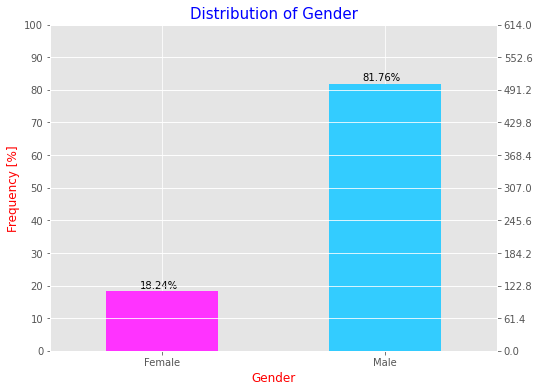

In [22]:
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
plt.title('Distribution of Gender',fontsize=15,color="b")
plt.xlabel("Gender",fontsize=12,color="r")
plt.ylabel('Frequency [%]',fontsize=12,color="r")
ax = (df.Gender.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0 , color=["#ff33ff","#33ccff"])
ax.set_yticks(np.arange(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

- Male applied approx 81.2 % for Loan  and female applied 18.7 % 
- Male applicant are approx 4.5 times more then female

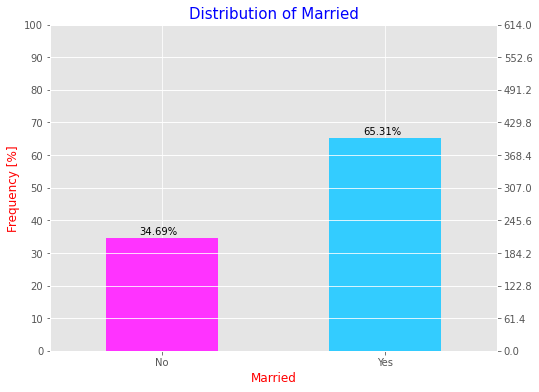

In [23]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Married',fontsize=15,color="b")
plt.xlabel("Married",fontsize=12,color="r")
plt.ylabel('Frequency [%]',fontsize=12,color="r")
ax = (df.Married.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0 , color=["#ff33ff","#33ccff"])
ax.set_yticks(np.arange(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

- 65.3 % of applicant are married and 34.6 % applicant are unmarried.

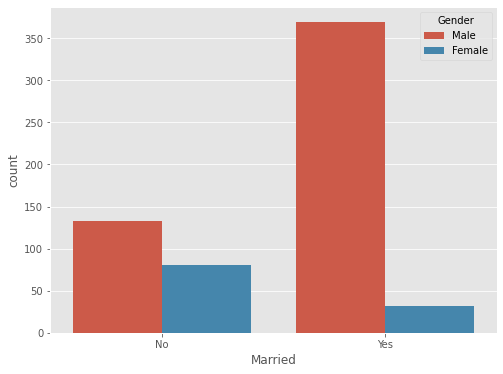

In [24]:
plt.figure(figsize=(8,6))
ax=sns.countplot(df["Married"],hue=df["Gender"])

- Approx 92 % of male applicant who are married had applied for Loan and approx 8 % female who are married, applied for loan.
- 62 % mlae who are unmarried had applied for loan and 38% female and unmarried who applied for loan.

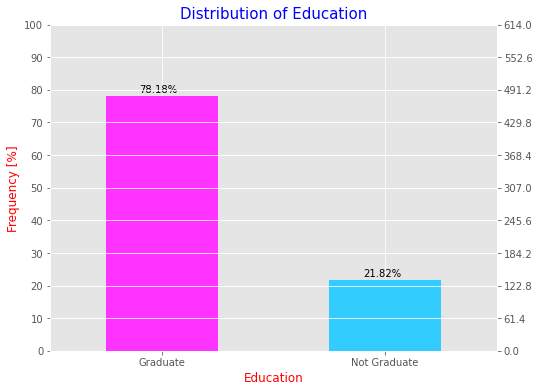

In [25]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Education',fontsize=15,color="b")
plt.xlabel("Education",fontsize=12,color="r")
plt.ylabel('Frequency [%]',fontsize=12,color="r")
ax = (df.Education.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0 , color=["#ff33ff","#33ccff"])
ax.set_yticks(np.arange(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

- 78.18 % are Graduated applicant and 21.8 are Not Granduated applicant who had applied for loan.

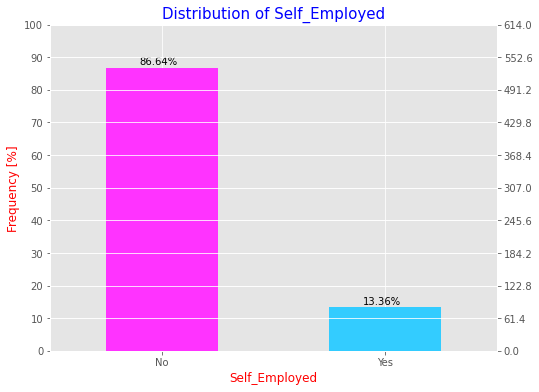

In [26]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Self_Employed',fontsize=15,color="b")
plt.xlabel("Self_Employed",fontsize=12,color="r")
plt.ylabel('Frequency [%]',fontsize=12,color="r")
ax = (df.Self_Employed.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0 , color=["#ff33ff","#33ccff"])
ax.set_yticks(np.arange(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

- only 13.3 % applicant are self employed rest all applicant were working somewhere.

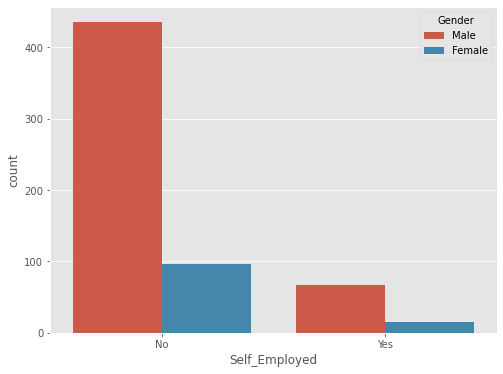

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(df["Self_Employed"],hue=df["Gender"])
plt.show()

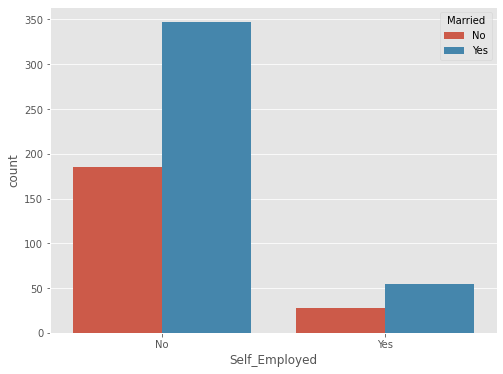

In [28]:
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
sns.countplot(df["Self_Employed"],hue=df["Married"])
plt.show()

- 65 % applicants who are married are self_employed and only 35 % applicants are those who are unmarried and self_employed.
- 70 % applicants who are married are Not self_employed and only 30 % applicants are those who are unmarried and not self_employed.

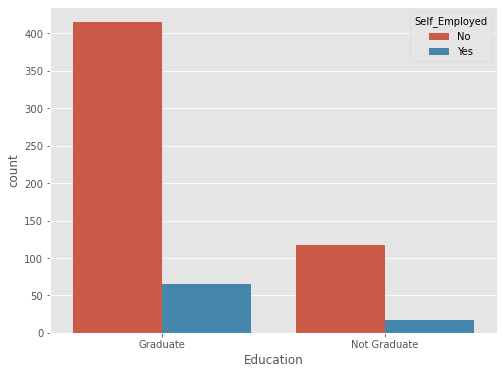

In [29]:
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
sns.countplot(df["Education"],hue=df["Self_Employed"])
plt.show()

- There are more number of applicant who are graduate and self employed then Not Graduate applicant.
- There are maximum number of applicant who are graduate but not self employed.

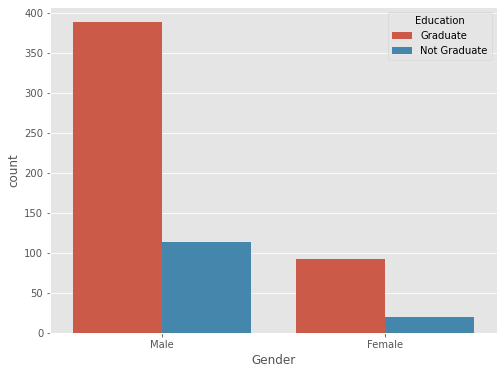

In [30]:
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
sns.countplot(df["Gender"],hue=df["Education"])
plt.show()

- majority of the male applicant are graduated


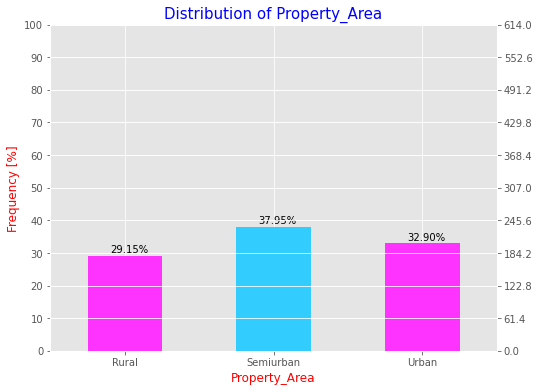

In [31]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Property_Area',fontsize=15,color="b")
plt.xlabel("Property_Area",fontsize=12,color="r")
plt.ylabel('Frequency [%]',fontsize=12,color="r")
ax = (df.Property_Area.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0 , color=["#ff33ff","#33ccff"])
ax.set_yticks(np.arange(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

- 37.9 % applicant are from semiurban area , 32.9% are from Urban area and 29.15 are from Rural area.

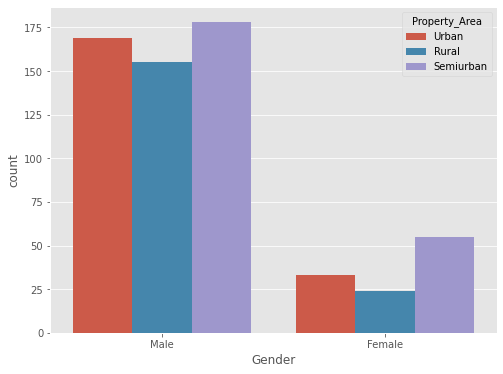

In [32]:
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
sns.countplot(df["Gender"],hue=df["Property_Area"])
plt.show()

- Maximum male & female applicant who applied for loan are from semi urban-area
- As compare to urban & semi urban areas people from rural area are applied less for loan

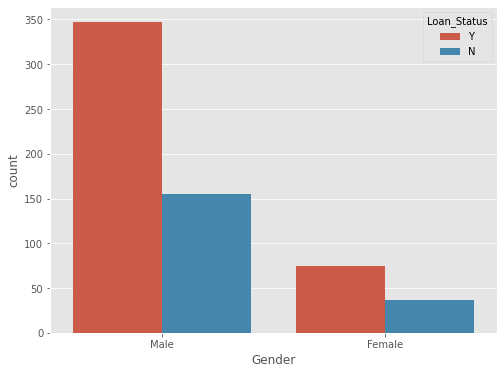

In [33]:
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

- 69.1 % from the total male applicant would have got loan and 30.8 % male would not have got the loan.
- 66.9 % from the total Female applicant would have got loan and 33.1 % Female would not have got the loan.

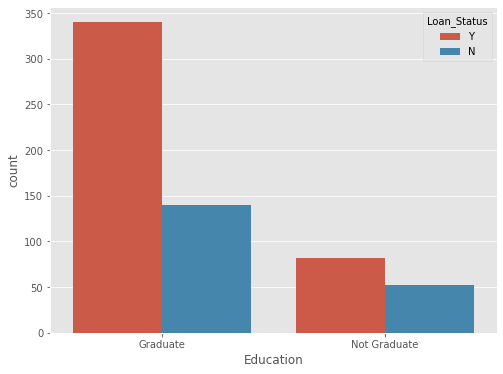

In [34]:
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

- 70 % applicant who are graduate would have got loan.
- 61 % applicant who are Not graduate would have also got loan.

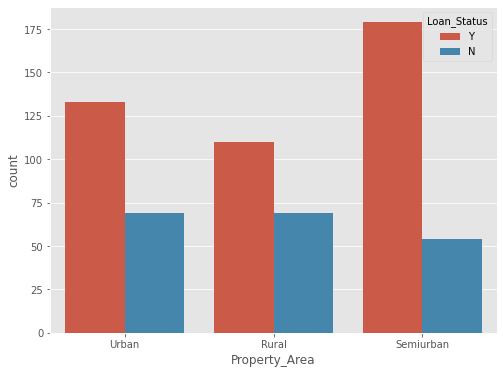

In [35]:
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
sns.countplot(df["Property_Area"],hue=df["Loan_Status"])
plt.show()

- Applicant from semiurban area have 76% chance of getting loan
- Applicant from Urban area have 65% chance of getting loan
- Applicant from Rural area have 61% chance of getting loan


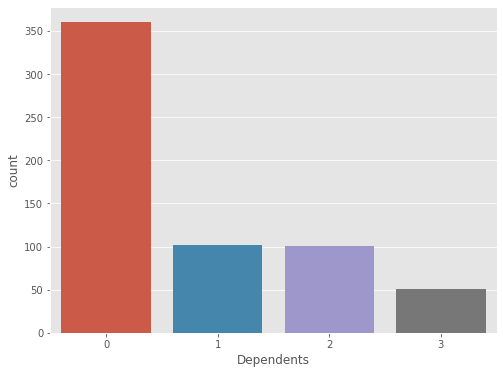

In [36]:
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
sns.countplot(df["Dependents"])
plt.show()

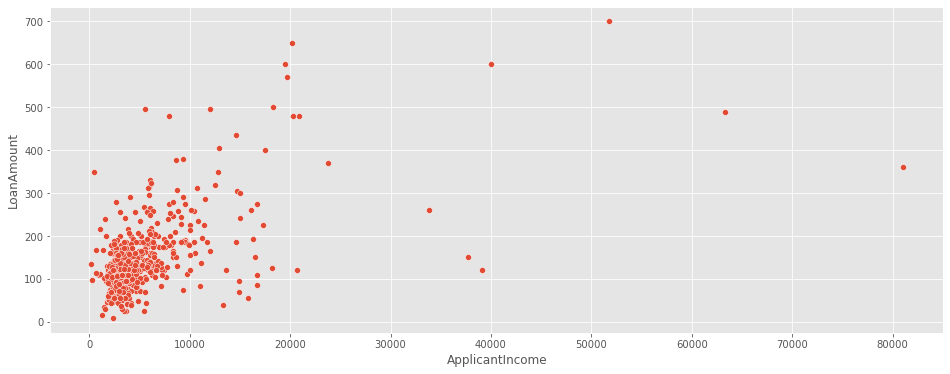

In [37]:
plt.figure(figsize=(16,6))
plt.style.use("ggplot")
ax=sns.scatterplot(df["ApplicantIncome"],df["LoanAmount"])
plt.show()

- from the above scatter plot it is clear that applicant who have less income needs loan.
- people from mid range 3000 - 60000 will not applied more for loan.


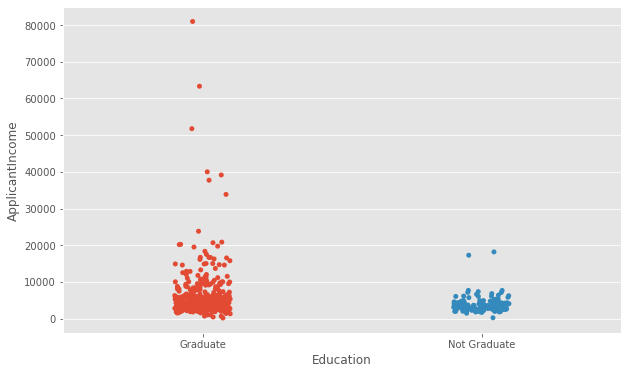

In [38]:
plt.figure(figsize=(10,6))
sns.stripplot(x=df["Education"], y=df["ApplicantIncome"]) 
plt.show()

In [39]:
(df[df["Education"]=="Not Graduate"]["ApplicantIncome"].max()) , (df[df["Education"]=="Graduate"]["ApplicantIncome"].max())

(18165, 81000)

In [40]:
(df[df["Education"]=="Not Graduate"]["ApplicantIncome"].min()) , (df[df["Education"]=="Graduate"]["ApplicantIncome"].min())

(210, 150)

- Maximumn Income of a graduate applicant is 81000 and Not Graduate applicant is 18165.
- Minimumn Income of a graduate applicant is 150 and Not Graduate applicant is 150.



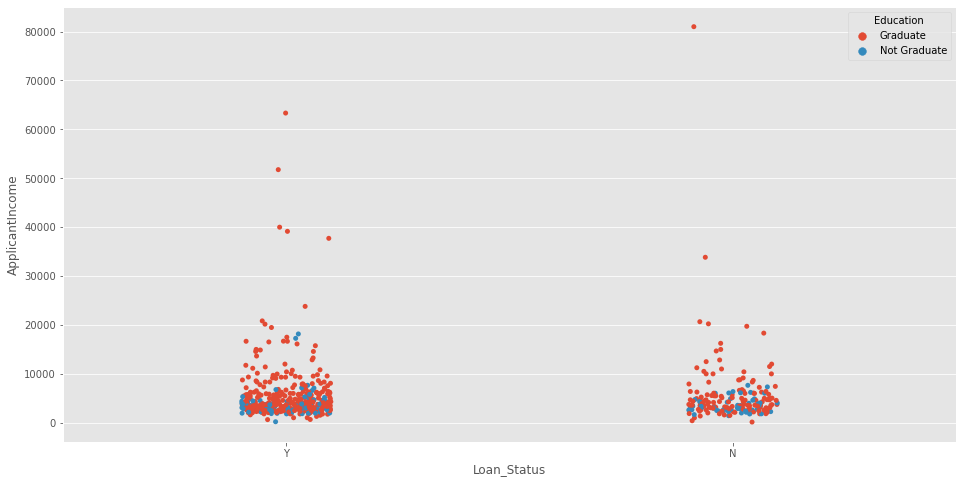

In [41]:
plt.figure(figsize=(16,8))
sns.stripplot(x=df["Loan_Status"], y=df["ApplicantIncome"],hue=df["Education"]) 
plt.show()

In [42]:
df[df["Loan_Status"]=="Y"]["ApplicantIncome"].max() , df[df["Loan_Status"]=="N"]["ApplicantIncome"].max()

(63337, 81000)

- Maximum income of applicant who have got loan is 63337
- And from above plot we cna see that if income of a applicant is more then 80000 he/she would not have get loan

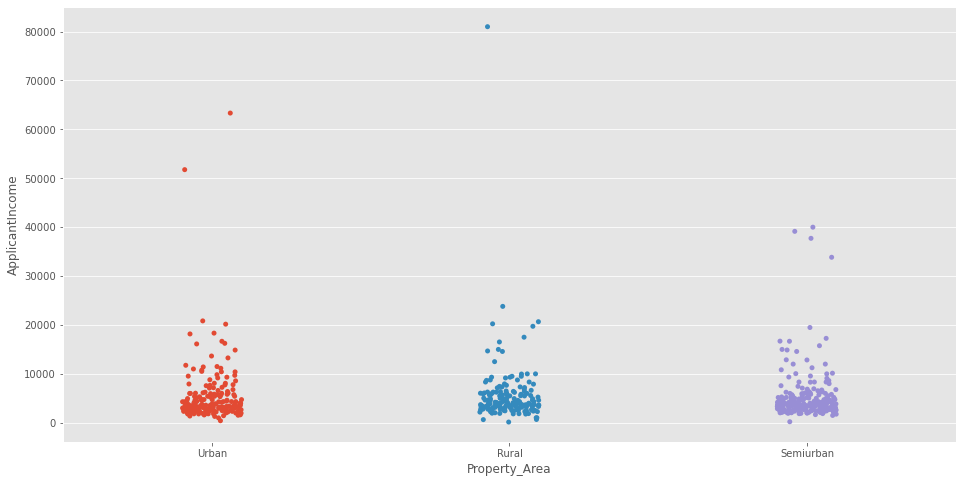

In [43]:
plt.figure(figsize=(16,8))
sns.stripplot(x=df["Property_Area"], y=df["ApplicantIncome"]) 
plt.show()

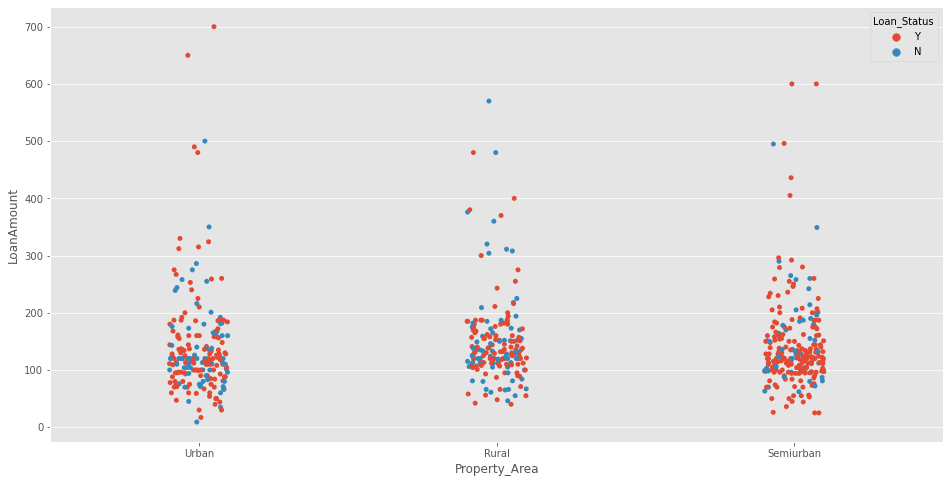

In [44]:
plt.figure(figsize=(16,8))
sns.stripplot(x=df["Property_Area"], y=df["LoanAmount"],hue=df["Loan_Status"]) 
plt.show()

- Maximum Loan amount that has been given is approx 700 and that was from Urban

# Pairplot

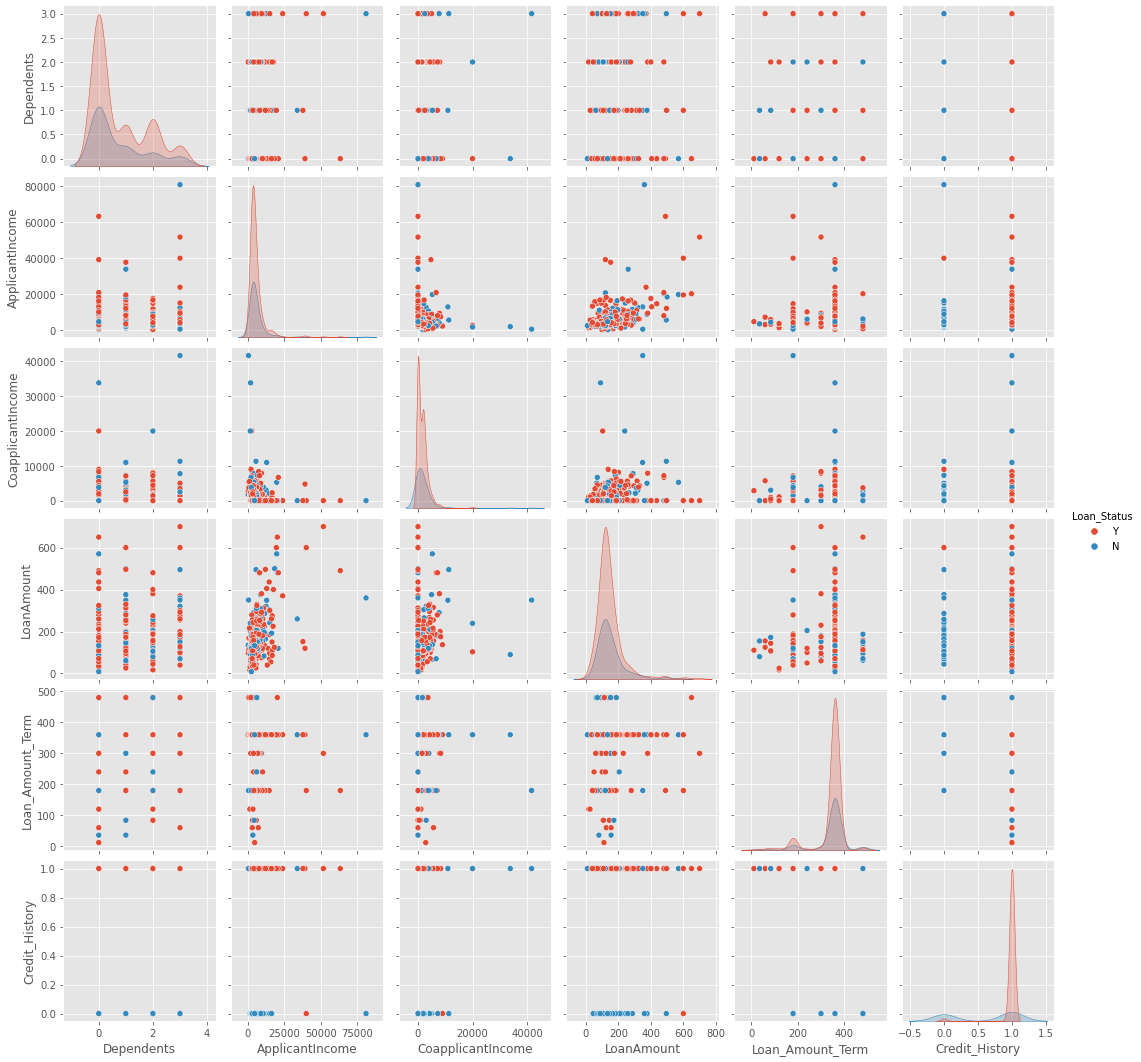

In [45]:
sns.pairplot(df.drop(columns=["Loan_ID","Gender_New","Married_New","Dependents_New","Self_Employed_New","LoanAmount_New","Loan_Amount_Term_New","Credit_History_New"]),hue="Loan_Status")

- Points are overlapped to each other and none of the column looks linearly corelated

# Checking Distribution

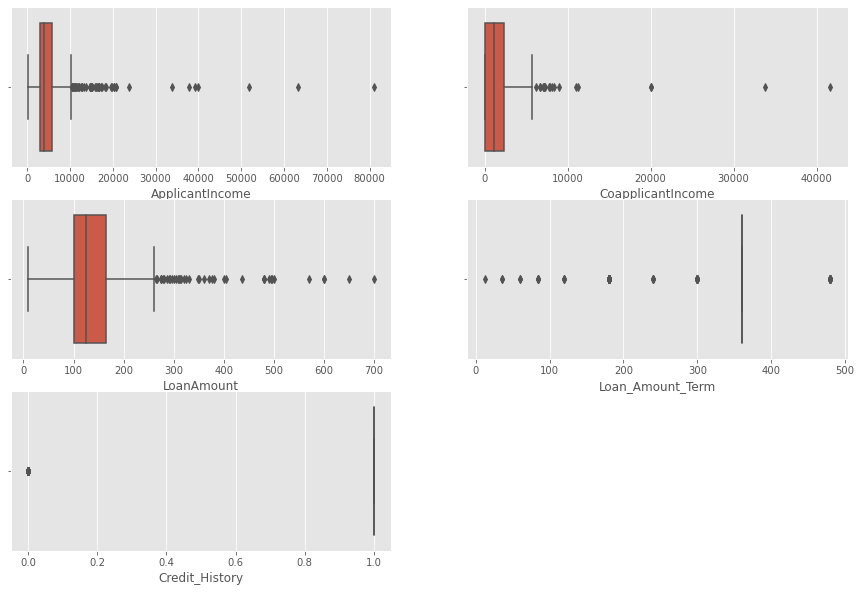

In [46]:
plt.figure(figsize=(15,10))
for i,j in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[j])
plt.show()    

# Handling outliers using IQR Method

In [47]:
for i in num_var[0:-2]:
    IQR = df[i].quantile(.75) - df[i].quantile(.25) 
    upper = df[i].quantile(.75) + 1.5 * IQR
    lower = df[i].quantile(.25) - 1.5 * IQR
    df[i] = np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))


In [48]:
# Handiling outliers using Winsornization method
upper = df['Loan_Amount_Term'].quantile(.99)
lower = df['Loan_Amount_Term'].quantile(.01)
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term']>upper,upper,np.where(df['Loan_Amount_Term']<lower,lower,df['Loan_Amount_Term']))

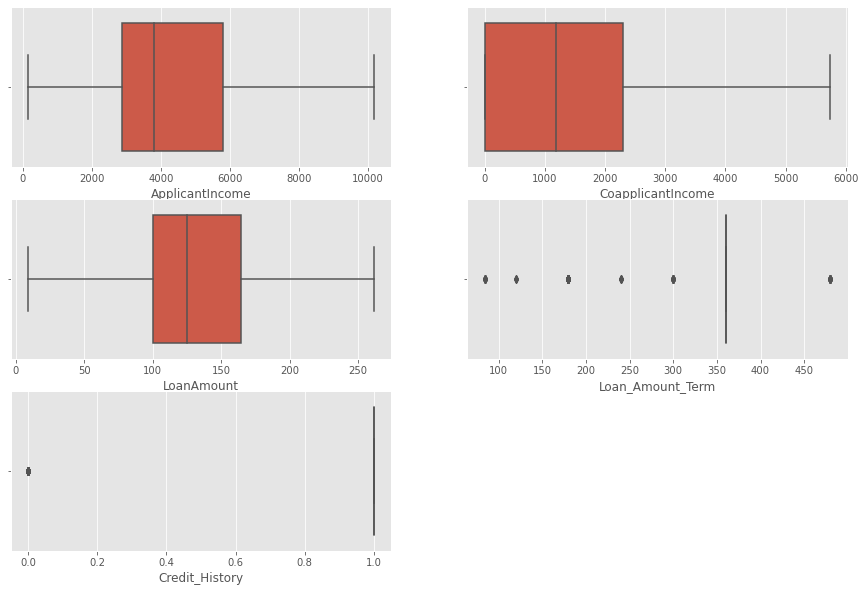

In [49]:
plt.figure(figsize=(15,10))
for i,j in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[j])
plt.show()

- sucessfully removed outliers

# Checking for distribution

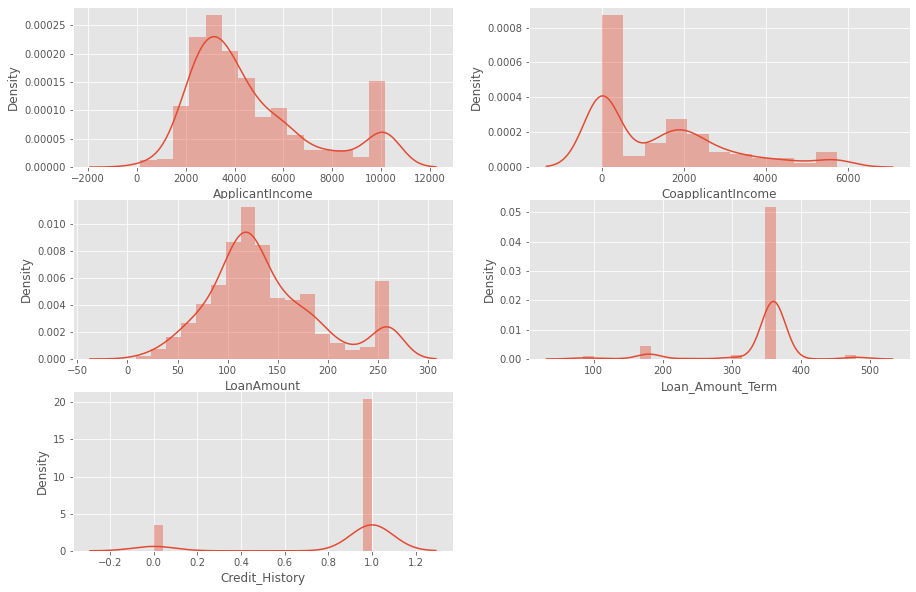

In [50]:
plt.figure(figsize=(15,10))
for i,j in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.distplot(df[j])
plt.show()    

columns have skewness hence we have to remove it.

In [51]:
df[num_var].skew()

ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.695733
Loan_Amount_Term    -2.258544
Credit_History      -2.021971
dtype: float64

In [52]:
for i in num_var:
    df[i],params = stats.boxcox(df[i]+0.0001)

In [53]:
df[num_var].skew()

ApplicantIncome      0.035841
CoapplicantIncome   -0.208499
LoanAmount           0.028177
Loan_Amount_Term     0.489465
Credit_History      -2.021971
dtype: float64

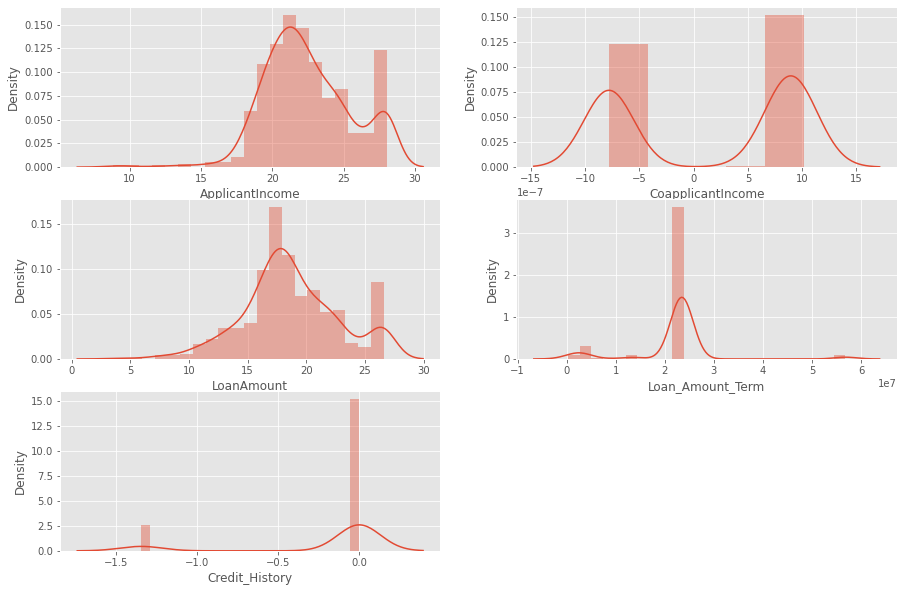

In [54]:
plt.figure(figsize=(15,10))
for i,j in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.distplot(df[j])
plt.show() 

here skewness has been removed. Now we can further proceed

In [55]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_New,Married_New,Dependents_New,Self_Employed_New,LoanAmount_New,Loan_Amount_Term_New,Credit_History_New
0,LP001002,Male,No,0,Graduate,No,24.466924,-7.797771,17.838395,2.345710e+07,0.0001,Urban,Y,0,0,0,0,1,0,0
1,LP001003,Male,Yes,1,Graduate,No,23.015939,8.412154,18.448719,2.345710e+07,0.0001,Rural,N,0,0,0,0,0,0,0


 we are going to remove Loan_ID column because it has all the unique values.

# Saperating input and output features.

In [56]:
X = df.drop(columns=["Loan_ID","Loan_Status"])

In [57]:
y = df["Loan_Status"]

In [58]:
X.shape

(614, 18)

In [59]:
y.shape

(614,)

In [60]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_New,Married_New,Dependents_New,Self_Employed_New,LoanAmount_New,Loan_Amount_Term_New,Credit_History_New
0,Male,No,0,Graduate,No,24.466924,-7.797771,17.838395,2.345710e+07,0.0001,Urban,0,0,0,0,1,0,0
1,Male,Yes,1,Graduate,No,23.015939,8.412154,18.448719,2.345710e+07,0.0001,Rural,0,0,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,20.664201,-7.797771,12.978063,2.345710e+07,0.0001,Urban,0,0,0,0,0,0,0
3,Male,Yes,0,Not Graduate,No,19.882012,9.004038,17.838395,2.345710e+07,0.0001,Urban,0,0,0,0,0,0,0
4,Male,No,0,Graduate,No,24.622850,-7.797771,19.398548,2.345710e+07,0.0001,Urban,0,0,0,0,0,0,0


In [61]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

# Performing Encoding for Categorical columns

In [62]:
step1 = ColumnTransformer(transformers=[
     ("ohe",OneHotEncoder(sparse=False,drop='first'),[0,1,4,10]),
     ("ordinal",OrdinalEncoder(),[3])
],remainder='passthrough')

In [63]:
X = step1.fit_transform(X)

In [64]:
X = pd.DataFrame(X)

In [65]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,24.466924,-7.797771,17.838395,2.345710e+07,0.000100,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,23.015939,8.412154,18.448719,2.345710e+07,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,20.664201,-7.797771,12.978063,2.345710e+07,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,19.882012,9.004038,17.838395,2.345710e+07,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,24.622850,-7.797771,19.398548,2.345710e+07,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.484874,-7.797771,13.501724,2.345710e+07,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,1.0,1.0,0.0,0.0,0.0,0.0,3.0,22.385881,-7.797771,9.829561,2.785611e+06,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
611,1.0,1.0,0.0,0.0,1.0,0.0,1.0,26.499819,6.079571,26.147575,2.345710e+07,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
612,1.0,1.0,0.0,0.0,1.0,0.0,2.0,26.094696,-7.797771,22.429083,2.345710e+07,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Performing Label encoding for Output column

In [66]:
le=LabelEncoder()

In [67]:
y = le.fit_transform(y)

In [68]:
y = pd.DataFrame(y)
y

,0
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Performing SMOTE technique to make output classes Balance

In [69]:
round(y.value_counts()/614,2)

1    0.69
0    0.31
dtype: float64

In [70]:
smote = SMOTE(sampling_strategy="minority")
X,y = smote.fit_resample(X,y)

In [71]:
y.value_counts()

1    422
0    422
dtype: int64

In [72]:
X.shape

(844, 19)

Now we did our output classes balanced

In [73]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,24.466924,-7.797771,17.838395,2.345710e+07,0.000100,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0
1,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.015939,8.412154,18.448719,2.345710e+07,0.000100,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,20.664201,-7.797771,12.978063,2.345710e+07,0.000100,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,19.882012,9.004038,17.838395,2.345710e+07,0.000100,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,24.622850,-7.797771,19.398548,2.345710e+07,0.000100,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,21.576283,-7.797771,15.603780,2.345710e+07,-1.343418,0.0,0.0,0.488182,0.0,0.000000,0.0,0.0
840,1.000000,0.726652,0.726652,0.000000,0.000000,0.000000,1.453303,25.209923,-7.797771,17.508750,2.345710e+07,-1.343418,0.0,0.0,0.000000,0.0,0.726652,0.0,0.0
841,1.000000,0.000000,0.000000,0.162416,0.837584,0.000000,0.000000,20.520106,-7.797771,13.363982,5.679773e+07,-0.218109,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
842,1.000000,0.041481,0.000000,0.000000,0.958519,0.041481,1.000000,20.741785,8.760823,17.131886,2.785611e+06,-1.343418,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


# Feature selection

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(X,y)

ExtraTreesClassifier()

In [75]:
print(extra.feature_importances_)

[0.02884172 0.05415835 0.02581524 0.06525572 0.04001133 0.03345248
 0.05809518 0.11878976 0.06479985 0.11658925 0.03884276 0.27145515
 0.00794308 0.00107502 0.00570838 0.01697876 0.0119331  0.00549421
 0.03476066]


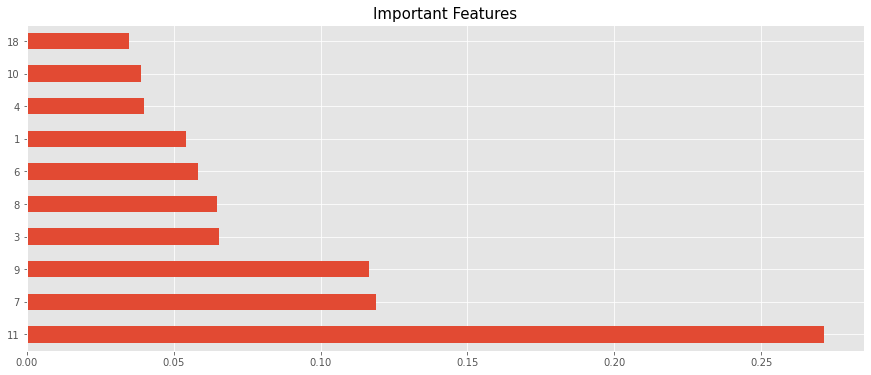

In [76]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [77]:
X = X[[1,3,4,5,6,7,8,9,10,11]]

# Importing sklearn libraries 

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.decomposition import PCA
import xgboost
from xgboost import XGBClassifier

# Checking model's accuracy

# LogisticRegression

In [79]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = LogisticRegression()
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is: ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  77.0
Testing accuracy is:  69.0

At Random State :  1
Training accuracy is:  76.0
Testing accuracy is:  76.0

At Random State :  2
Training accuracy is:  74.0
Testing accuracy is:  80.0

At Random State :  3
Training accuracy is:  75.0
Testing accuracy is:  76.0

At Random State :  4
Training accuracy is:  75.0
Testing accuracy is:  76.0

At Random State :  5
Training accuracy is:  76.0
Testing accuracy is:  75.0

At Random State :  6
Training accuracy is:  76.0
Testing accuracy is:  77.0

At Random State :  7
Training accuracy is:  76.0
Testing accuracy is:  78.0

At Random State :  8
Training accuracy is:  76.0
Testing accuracy is:  72.0

At Random State :  9
Training accuracy is:  76.0
Testing accuracy is:  79.0

At Random State :  10
Training accuracy is:  75.0
Testing accuracy is:  76.0

At Random State :  11
Training accuracy is:  75.0
Testing accuracy is:  76.0

At Random State :  12
Training accuracy is:  76.0
Testing accuracy is:  78

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=64,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.7555555555555555
0.7810650887573964

cross validation score 73.94817927170868
Standard Deviation 3.5973707663475865
Training accuracy 76.0
Test Accuracy 78.0
Confusion Matrix

[[53 31]
 [ 6 79]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.63      0.74        84
           1       0.72      0.93      0.81        85

    accuracy                           0.78       169
   macro avg       0.81      0.78      0.78       169
weighted avg       0.81      0.78      0.78       169



# KNeighborsClassifier

In [81]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = KNeighborsClassifier()
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is: ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  85.0
Testing accuracy is:  80.0

At Random State :  1
Training accuracy is:  85.0
Testing accuracy is:  73.0

At Random State :  2
Training accuracy is:  85.0
Testing accuracy is:  83.0

At Random State :  3
Training accuracy is:  85.0
Testing accuracy is:  82.0

At Random State :  4
Training accuracy is:  84.0
Testing accuracy is:  78.0

At Random State :  5
Training accuracy is:  85.0
Testing accuracy is:  79.0

At Random State :  6
Training accuracy is:  85.0
Testing accuracy is:  81.0

At Random State :  7
Training accuracy is:  84.0
Testing accuracy is:  80.0

At Random State :  8
Training accuracy is:  85.0
Testing accuracy is:  80.0

At Random State :  9
Training accuracy is:  85.0
Testing accuracy is:  79.0

At Random State :  10
Training accuracy is:  84.0
Testing accuracy is:  80.0

At Random State :  11
Training accuracy is:  84.0
Testing accuracy is:  79.0

At Random State :  12
Training accuracy is:  85.0
Testing accuracy is:  78

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=2,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.8474074074074074
0.8224852071005917

cross validation score 78.1078431372549
Standard Deviation 6.930844453456854
Training accuracy 85.0
Test Accuracy 82.0
Confusion Matrix

[[68 17]
 [13 71]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.80      0.82        85
           1       0.81      0.85      0.83        84

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169



# SVM

In [83]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = SVC()
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is: ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  82.0
Testing accuracy is:  76.0

At Random State :  1
Training accuracy is:  83.0
Testing accuracy is:  70.0

At Random State :  2
Training accuracy is:  81.0
Testing accuracy is:  80.0

At Random State :  3
Training accuracy is:  82.0
Testing accuracy is:  84.0

At Random State :  4
Training accuracy is:  82.0
Testing accuracy is:  77.0

At Random State :  5
Training accuracy is:  83.0
Testing accuracy is:  76.0

At Random State :  6
Training accuracy is:  82.0
Testing accuracy is:  78.0

At Random State :  7
Training accuracy is:  80.0
Testing accuracy is:  78.0

At Random State :  8
Training accuracy is:  82.0
Testing accuracy is:  76.0

At Random State :  9
Training accuracy is:  81.0
Testing accuracy is:  79.0

At Random State :  10
Training accuracy is:  81.0
Testing accuracy is:  78.0

At Random State :  11
Training accuracy is:  81.0
Testing accuracy is:  79.0

At Random State :  12
Training accuracy is:  83.0
Testing accuracy is:  75

- At random state 36 training and testing accuracy is 81 for SVC.

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=19,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.8311111111111111
0.7692307692307693

cross validation score 76.68067226890757
Standard Deviation 4.5863717772651675
Training accuracy 83.0
Test Accuracy 77.0
Confusion Matrix

[[51 33]
 [ 6 79]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.61      0.72        84
           1       0.71      0.93      0.80        85

    accuracy                           0.77       169
   macro avg       0.80      0.77      0.76       169
weighted avg       0.80      0.77      0.76       169



# DecisionTreeClassifier

In [85]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = DecisionTreeClassifier(max_depth=9)
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is:  ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  92.0
Testing accuracy is:   78.0

At Random State :  1
Training accuracy is:  93.0
Testing accuracy is:   77.0

At Random State :  2
Training accuracy is:  91.0
Testing accuracy is:   78.0

At Random State :  3
Training accuracy is:  93.0
Testing accuracy is:   79.0

At Random State :  4
Training accuracy is:  92.0
Testing accuracy is:   74.0

At Random State :  5
Training accuracy is:  93.0
Testing accuracy is:   79.0

At Random State :  6
Training accuracy is:  92.0
Testing accuracy is:   77.0

At Random State :  7
Training accuracy is:  92.0
Testing accuracy is:   74.0

At Random State :  8
Training accuracy is:  92.0
Testing accuracy is:   75.0

At Random State :  9
Training accuracy is:  90.0
Testing accuracy is:   83.0

At Random State :  10
Training accuracy is:  93.0
Testing accuracy is:   78.0

At Random State :  11
Training accuracy is:  91.0
Testing accuracy is:   80.0

At Random State :  12
Training accuracy is:  91.0
Testing accu

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=94,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.9333333333333333
0.8284023668639053

cross validation score 78.24789915966386
Standard Deviation 8.594356680713778
Training accuracy 93.0
Test Accuracy 83.0
Confusion Matrix

[[68 17]
 [12 72]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.80      0.82        85
           1       0.81      0.86      0.83        84

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169



# RandomForestClassifier

In [87]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = RandomForestClassifier(max_depth=9)
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is:  ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  96.0
Testing accuracy is:   83.0

At Random State :  1
Training accuracy is:  96.0
Testing accuracy is:   81.0

At Random State :  2
Training accuracy is:  95.0
Testing accuracy is:   83.0

At Random State :  3
Training accuracy is:  96.0
Testing accuracy is:   89.0

At Random State :  4
Training accuracy is:  95.0
Testing accuracy is:   84.0

At Random State :  5
Training accuracy is:  95.0
Testing accuracy is:   81.0

At Random State :  6
Training accuracy is:  96.0
Testing accuracy is:   85.0

At Random State :  7
Training accuracy is:  95.0
Testing accuracy is:   82.0

At Random State :  8
Training accuracy is:  95.0
Testing accuracy is:   82.0

At Random State :  9
Training accuracy is:  95.0
Testing accuracy is:   87.0

At Random State :  10
Training accuracy is:  97.0
Testing accuracy is:   83.0

At Random State :  11
Training accuracy is:  96.0
Testing accuracy is:   85.0

At Random State :  12
Training accuracy is:  96.0
Testing accu

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=61,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.9555555555555556
0.8816568047337278

cross validation score 84.30532212885154
Standard Deviation 11.008305446425222
Training accuracy 96.0
Test Accuracy 88.0
Confusion Matrix

[[69 15]
 [ 5 80]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.82      0.87        84
           1       0.84      0.94      0.89        85

    accuracy                           0.88       169
   macro avg       0.89      0.88      0.88       169
weighted avg       0.89      0.88      0.88       169



# AdaBoostClassifier

In [89]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = AdaBoostClassifier()
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is:  ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  85.0
Testing accuracy is:   80.0

At Random State :  1
Training accuracy is:  86.0
Testing accuracy is:   80.0

At Random State :  2
Training accuracy is:  84.0
Testing accuracy is:   84.0

At Random State :  3
Training accuracy is:  85.0
Testing accuracy is:   81.0

At Random State :  4
Training accuracy is:  85.0
Testing accuracy is:   80.0

At Random State :  5
Training accuracy is:  86.0
Testing accuracy is:   78.0

At Random State :  6
Training accuracy is:  85.0
Testing accuracy is:   83.0

At Random State :  7
Training accuracy is:  85.0
Testing accuracy is:   82.0

At Random State :  8
Training accuracy is:  86.0
Testing accuracy is:   80.0

At Random State :  9
Training accuracy is:  84.0
Testing accuracy is:   86.0

At Random State :  10
Training accuracy is:  84.0
Testing accuracy is:   82.0

At Random State :  11
Training accuracy is:  85.0
Testing accuracy is:   80.0

At Random State :  12
Training accuracy is:  85.0
Testing accu

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=21,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.8488888888888889
0.8284023668639053

cross validation score 81.0910364145658
Standard Deviation 9.20017222840523
Training accuracy 85.0
Test Accuracy 83.0
Confusion Matrix

[[65 20]
 [ 9 75]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.76      0.82        85
           1       0.79      0.89      0.84        84

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169



# Gradient Boosting

In [91]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = GradientBoostingClassifier()
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is:  ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  91.0
Testing accuracy is:   83.0

At Random State :  1
Training accuracy is:  92.0
Testing accuracy is:   79.0

At Random State :  2
Training accuracy is:  92.0
Testing accuracy is:   83.0

At Random State :  3
Training accuracy is:  91.0
Testing accuracy is:   85.0

At Random State :  4
Training accuracy is:  92.0
Testing accuracy is:   80.0

At Random State :  5
Training accuracy is:  92.0
Testing accuracy is:   82.0

At Random State :  6
Training accuracy is:  92.0
Testing accuracy is:   83.0

At Random State :  7
Training accuracy is:  93.0
Testing accuracy is:   82.0

At Random State :  8
Training accuracy is:  92.0
Testing accuracy is:   80.0

At Random State :  9
Training accuracy is:  91.0
Testing accuracy is:   82.0

At Random State :  10
Training accuracy is:  93.0
Testing accuracy is:   81.0

At Random State :  11
Training accuracy is:  93.0
Testing accuracy is:   82.0

At Random State :  12
Training accuracy is:  92.0
Testing accu

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=76,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.9214814814814815
0.8461538461538461

cross validation score 82.05182072829132
Standard Deviation 10.980449322437371
Training accuracy 92.0
Test Accuracy 85.0
Confusion Matrix

[[65 19]
 [ 7 78]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.77      0.83        84
           1       0.80      0.92      0.86        85

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169



# XGBClassifier

In [93]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = XGBClassifier()
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is:  ",round(pipe.score(X_test,y_test),2)*100)
    print()

[21:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  0
Training accuracy is:  100.0
Testing accuracy is:   86.0

[21:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  1
Training accuracy is:  100.0
Testing accuracy is:   81.0

[21:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'err

At Random State :  21
Training accuracy is:  100.0
Testing accuracy is:   82.0

[21:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  22
Training accuracy is:  100.0
Testing accuracy is:   83.0

[21:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  23
Training accuracy is:  100.0
Testing accuracy is:   78.0

[21:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default

At Random State :  43
Training accuracy is:  100.0
Testing accuracy is:   84.0

[21:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  44
Training accuracy is:  100.0
Testing accuracy is:   85.0

[21:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  45
Training accuracy is:  100.0
Testing accuracy is:   83.0

[21:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default

At Random State :  65
Training accuracy is:  100.0
Testing accuracy is:   84.0

[21:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  66
Training accuracy is:  100.0
Testing accuracy is:   88.0

[21:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  67
Training accuracy is:  100.0
Testing accuracy is:   86.0

[21:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default

At Random State :  87
Training accuracy is:  100.0
Testing accuracy is:   83.0

[21:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  88
Training accuracy is:  100.0
Testing accuracy is:   81.0

[21:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At Random State :  89
Training accuracy is:  100.0
Testing accuracy is:   81.0

[21:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=94,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

[21:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9985185185185185
0.8757396449704142

[21:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:32] WARNING: C:/Users/Ad

# ExtraTreeClassifier

In [95]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = ExtraTreesClassifier( )
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is:  ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  100.0
Testing accuracy is:   84.0

At Random State :  1
Training accuracy is:  100.0
Testing accuracy is:   85.0

At Random State :  2
Training accuracy is:  100.0
Testing accuracy is:   88.0

At Random State :  3
Training accuracy is:  100.0
Testing accuracy is:   86.0

At Random State :  4
Training accuracy is:  100.0
Testing accuracy is:   80.0

At Random State :  5
Training accuracy is:  100.0
Testing accuracy is:   84.0

At Random State :  6
Training accuracy is:  100.0
Testing accuracy is:   87.0

At Random State :  7
Training accuracy is:  100.0
Testing accuracy is:   84.0

At Random State :  8
Training accuracy is:  100.0
Testing accuracy is:   83.0

At Random State :  9
Training accuracy is:  100.0
Testing accuracy is:   83.0

At Random State :  10
Training accuracy is:  100.0
Testing accuracy is:   83.0

At Random State :  11
Training accuracy is:  100.0
Testing accuracy is:   84.0

At Random State :  12
Training accuracy is:  100.0

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=19,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.9985185185185185
0.9053254437869822

cross validation score 83.93977591036416
Standard Deviation 9.544897665262884
Training accuracy 100.0
Test Accuracy 91.0
Confusion Matrix

[[77  7]
 [ 9 76]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.92      0.91        84
           1       0.92      0.89      0.90        85

    accuracy                           0.91       169
   macro avg       0.91      0.91      0.91       169
weighted avg       0.91      0.91      0.91       169



# BaggingClassifier

In [97]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = BaggingClassifier( )
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is:  ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  99.0
Testing accuracy is:   80.0

At Random State :  1
Training accuracy is:  99.0
Testing accuracy is:   80.0

At Random State :  2
Training accuracy is:  99.0
Testing accuracy is:   85.0

At Random State :  3
Training accuracy is:  99.0
Testing accuracy is:   84.0

At Random State :  4
Training accuracy is:  99.0
Testing accuracy is:   85.0

At Random State :  5
Training accuracy is:  99.0
Testing accuracy is:   84.0

At Random State :  6
Training accuracy is:  99.0
Testing accuracy is:   86.0

At Random State :  7
Training accuracy is:  99.0
Testing accuracy is:   80.0

At Random State :  8
Training accuracy is:  99.0
Testing accuracy is:   79.0

At Random State :  9
Training accuracy is:  98.0
Testing accuracy is:   86.0

At Random State :  10
Training accuracy is:  98.0
Testing accuracy is:   78.0

At Random State :  11
Training accuracy is:  98.0
Testing accuracy is:   84.0

At Random State :  12
Training accuracy is:  99.0
Testing accu

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=46,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.9896296296296296
0.8461538461538461

cross validation score 80.02661064425769
Standard Deviation 7.6142883471303255
Training accuracy 99.0
Test Accuracy 85.0
Confusion Matrix

[[71 14]
 [12 72]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.84      0.85        85
           1       0.84      0.86      0.85        84

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169



# BaggingClassifier with gradientboost as a base model

In [99]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = BaggingClassifier( base_estimator= GradientBoostingClassifier())
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is:  ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  91.0
Testing accuracy is:   82.0

At Random State :  1
Training accuracy is:  92.0
Testing accuracy is:   78.0

At Random State :  2
Training accuracy is:  90.0
Testing accuracy is:   84.0

At Random State :  3
Training accuracy is:  91.0
Testing accuracy is:   87.0

At Random State :  4
Training accuracy is:  92.0
Testing accuracy is:   81.0

At Random State :  5
Training accuracy is:  90.0
Testing accuracy is:   82.0

At Random State :  6
Training accuracy is:  91.0
Testing accuracy is:   81.0

At Random State :  7
Training accuracy is:  91.0
Testing accuracy is:   82.0

At Random State :  8
Training accuracy is:  91.0
Testing accuracy is:   78.0

At Random State :  9
Training accuracy is:  92.0
Testing accuracy is:   84.0

At Random State :  10
Training accuracy is:  91.0
Testing accuracy is:   81.0

At Random State :  11
Training accuracy is:  90.0
Testing accuracy is:   83.0

At Random State :  12
Training accuracy is:  92.0
Testing accu

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=21,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.8977777777777778
0.8461538461538461

cross validation score 81.69607843137253
Standard Deviation 11.14236985835883
Training accuracy 90.0
Test Accuracy 85.0
Confusion Matrix

[[64 20]
 [ 6 79]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.76      0.83        84
           1       0.80      0.93      0.86        85

    accuracy                           0.85       169
   macro avg       0.86      0.85      0.84       169
weighted avg       0.86      0.85      0.85       169



# VotingClassifier

In [101]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
rf= RandomForestClassifier()
etc = ExtraTreeClassifier()

est = [("ada",ada),("gb",gb),("rf",rf),("etc",etc)]


step2 = VotingClassifier(estimators=est,voting="soft",weights=[2,5,5,1])

pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    print("At Random State : ",i)
    print("Training accuracy is: ",round(pipe.score(X_train,y_train),2)*100)
    print("Testing accuracy is:  ",round(pipe.score(X_test,y_test),2)*100)
    print()

At Random State :  0
Training accuracy is:  99.0
Testing accuracy is:   84.0

At Random State :  1
Training accuracy is:  99.0
Testing accuracy is:   84.0

At Random State :  2
Training accuracy is:  99.0
Testing accuracy is:   86.0

At Random State :  3
Training accuracy is:  99.0
Testing accuracy is:   88.0

At Random State :  4
Training accuracy is:  99.0
Testing accuracy is:   81.0

At Random State :  5
Training accuracy is:  99.0
Testing accuracy is:   85.0

At Random State :  6
Training accuracy is:  99.0
Testing accuracy is:   86.0

At Random State :  7
Training accuracy is:  99.0
Testing accuracy is:   83.0

At Random State :  8
Training accuracy is:  99.0
Testing accuracy is:   83.0

At Random State :  9
Training accuracy is:  99.0
Testing accuracy is:   83.0

At Random State :  10
Training accuracy is:  99.0
Testing accuracy is:   86.0

At Random State :  11
Training accuracy is:  99.0
Testing accuracy is:   84.0

At Random State :  12
Training accuracy is:  99.0
Testing accu

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=19,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

0.9911111111111112
0.8875739644970414

cross validation score 83.23949579831933
Standard Deviation 11.307639964166343
Training accuracy 99.0
Test Accuracy 89.0
Confusion Matrix

[[72 12]
 [ 7 78]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.86      0.88        84
           1       0.87      0.92      0.89        85

    accuracy                           0.89       169
   macro avg       0.89      0.89      0.89       169
weighted avg       0.89      0.89      0.89       169



# Hyper parameter tuning

In [117]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = GradientBoostingClassifier()
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=76,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)

print('Confusion Matrix\n')
print()
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

Training accuracy 91.0
Test Accuracy 88.0

cross validation score 82.05182072829132
Standard Deviation 11.091231313392207
Confusion Matrix


[[66 18]
 [ 3 82]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.79      0.86        84
           1       0.82      0.96      0.89        85

    accuracy                           0.88       169
   macro avg       0.89      0.88      0.87       169
weighted avg       0.89      0.88      0.87       169



- Choosing Gradient boosting Classifier as a best model because Training and testing accuracy is approximately same which means model is not overfitting.
- we can increase accuracy by doing hyper parameter tuning.

In [118]:
params= {    
    "step2__max_depth":np.arange(3,4,1),
    "step2__learning_rate":np.arange(.1,.9,.1),
    "step2__max_features":np.arange(.5,.75,.5),
    "step2__loss":['deviance', 'exponential'],
}

In [119]:
randomscv = RandomizedSearchCV(pipe,params,cv=5,n_jobs=-1)

In [120]:
randomscv.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaler',
                                                                               StandardScaler(),
                                                                               slice(0, 11, None))])),
                                             ('step2',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'step2__learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'step2__loss': ['deviance',
                                                        'exponential'],
                                        'step2__max_depth': array([3]),
                                        'step2__max_f

In [121]:
randomscv.best_params_

{'step2__max_features': 0.5,
 'step2__max_depth': 3,
 'step2__loss': 'deviance',
 'step2__learning_rate': 0.2}

In [150]:
step1 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step2 = GradientBoostingClassifier(max_depth=3,max_features=.5,random_state=3,learning_rate=.2,loss="deviance")
pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=76,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
print()
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).mean()*100)
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy',cv=10).std()*100)

print('Confusion Matrix\n')
print()
print(confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

Training accuracy 96.0
Test Accuracy 89.0

cross validation score 81.34173669467786
Standard Deviation 11.171372298840549
Confusion Matrix


[[72 12]
 [ 6 79]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.86      0.89        84
           1       0.87      0.93      0.90        85

    accuracy                           0.89       169
   macro avg       0.90      0.89      0.89       169
weighted avg       0.90      0.89      0.89       169



#### Here accuracy is increased by 1% and precission,recall & f1-score is also increased after hyperparameter tuning.

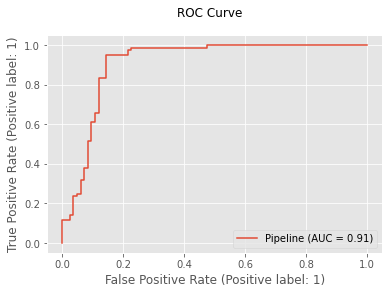

In [151]:
from sklearn import metrics
plot = metrics.plot_roc_curve(pipe, X_test, y_test)
plot.figure_.suptitle("ROC Curve")
plt.show()

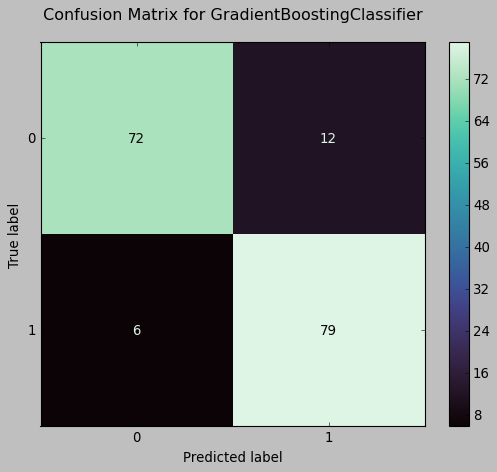

In [154]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='mako')
plt.style.use("classic")
plt.title(' Confusion Matrix for GradientBoostingClassifier \n')
plt.show()

# Saving model

In [155]:
import pickle
pickle.dump(pipe,open("Loan_prediction_Project.pkl","wb"))